<a href="https://colab.research.google.com/github/SonolaMoyo/HamoyeSummer2022/blob/main/summerStageBQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: ***Sonola Moyosoluwalorun*** <br>
ID: 1479301970c1f000

***Hamoye Summer Stage B Quiz***

In [98]:
import numpy as np
import pandas as pd
import matplotlib as matplot
import seaborn as sns
import sklearn

In [99]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [100]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [101]:
#rename columns
column_names = {"date": "date", "Appliances": "app_wh", "lights":"lights_wh", "T1":"kitchenTemp_cel", "RH_1":"kitchenHum_percet", "T2":"livingTemp_cel", "RH_2":"livingHum_percet", "T3":"laundryTemp_cel", "RH_3":"laundryHum_percet", "T4":"officeTemp_cel", "RH_4":"officeHum_percet", "T5":"bathroomTemp_cel", "RH_5":"bathroomHum_percet", "T6":"outbuildingTemp_cel", "RH_6":"outbuildingHum_percet", "T7":"ironingTemp_cel", "RH_7":"ironingHum_percet", "T8":"teenagerTemp_cel", "RH_8":"teenagerHum_percet", "T9":"parentTemp_cel", "RH_9":"parentHum_percet", "T_out":"tempOut_cel", "Press_mm_hg":"Press_mm_hg", "RH_out":"humOut_percet", "Windspeed":"windspeed", "Visibility":"Visibility", "Tdewpoint":"Tdewpoint", "rv1":"randomVar1", "rv2":"randomVar2"}
dataset = dataset.rename(columns=column_names)

In [102]:
#clean the dataset
dataset.isnull().sum()

##shows the dataset is already clean

date                     0
app_wh                   0
lights_wh                0
kitchenTemp_cel          0
kitchenHum_percet        0
livingTemp_cel           0
livingHum_percet         0
laundryTemp_cel          0
laundryHum_percet        0
officeTemp_cel           0
officeHum_percet         0
bathroomTemp_cel         0
bathroomHum_percet       0
outbuildingTemp_cel      0
outbuildingHum_percet    0
ironingTemp_cel          0
ironingHum_percet        0
teenagerTemp_cel         0
teenagerHum_percet       0
parentTemp_cel           0
parentHum_percet         0
tempOut_cel              0
Press_mm_hg              0
humOut_percet            0
windspeed                0
Visibility               0
Tdewpoint                0
randomVar1               0
randomVar2               0
dtype: int64

In [103]:
simple_linear_reg = dataset[['livingTemp_cel', 'tempOut_cel']]

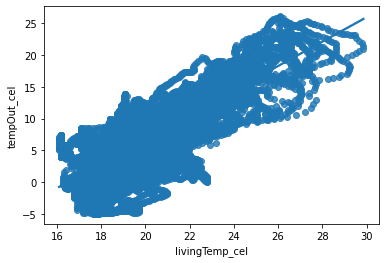

In [104]:
#Plot an regressive plot
sns.regplot(x="livingTemp_cel", y='tempOut_cel', data=simple_linear_reg)

***Train a Regression Model***

In [105]:
#firstly we normalise our dataset to a common scale using the min max scalar
dataset = dataset.drop(columns=['date']) #drop date column
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
normalised_df = pd.DataFrame(scalar.fit_transform(dataset), columns=dataset.columns)
featured_df = normalised_df.drop(columns=['app_wh', 'lights_wh'])
heating_target = normalised_df['app_wh']

In [74]:
#now we split our dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(featured_df, heating_target, test_size=0.3, random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression
#fit the model with the training dataset
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
#obtain prediction
predictions = linear_model.predict(x_test)

***Checking Regression Performance***

***1. Mean Absolute Error***

In [116]:
from sklearn.metrics import mean_absolute_error
mean_abs_err = mean_absolute_error(y_test, predictions)
round(mean_abs_err, 2)

0.05

***Residual Sum of Squares (RSS)***

In [107]:
rss = np.sum(np.square(y_test - predictions))
round(rss, 2)

45.35

***Root Mean Square Error (RMSE)***

In [106]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)

0.088

***R-Squared***

In [117]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
round(r2, 2)

0.15

***Penalization Methods***
1. Rigde Regression
2. Feature Selection: Lasso Regression

In [109]:
#Rigde Regression
from sklearn.linear_model import Ridge
rigde_reg = Ridge(alpha=0.4)
rigde_reg.fit(x_train, y_train)
print(rigde_reg.coef_)

[-0.01840621  0.5195253  -0.20139673 -0.41107123  0.28808681  0.0951346
  0.02738389  0.02457853 -0.01985322  0.01615237  0.21729178  0.03551862
  0.01009781 -0.04597696  0.10102815 -0.15683005 -0.1889163  -0.04136654
 -0.26217227  0.00658387 -0.05472365  0.03026762  0.01207649  0.08312757
  0.00074817  0.00074817]


In [110]:
#Feature Selection: Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [111]:
#comparing the effects of regularisation 
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [112]:
linear_model_weight = get_weights_df(linear_model, x_train, "Linear Model")
rigde_weight_df = get_weights_df(rigde_reg, x_train, "Rigde Weight")
lasso_weight_df = get_weights_df(lasso_reg, x_train, "Lasso Weight")

In [113]:
final_weights = pd.merge(linear_model_weight, rigde_weight_df, on="Features")
final_weights_df = pd.merge(final_weights, lasso_weight_df, on="Features")

In [114]:
final_weights = pd.merge(linear_model_weight, rigde_weight_df, on="Features")
final_weights_df = pd.merge(final_weights, lasso_weight_df, on="Features")

In [115]:
print(final_weights_df)

                 Features  Linear Model  Rigde Weight  Lasso Weight
0        livingHum_percet     -0.456698     -0.411071     -0.000000
1             tempOut_cel     -0.321860     -0.262172      0.000000
2          livingTemp_cel     -0.236178     -0.201397      0.000000
3          parentTemp_cel     -0.189941     -0.188916     -0.000000
4      teenagerHum_percet     -0.157595     -0.156830     -0.000110
5           humOut_percet     -0.077671     -0.054724     -0.049557
6       ironingHum_percet     -0.044614     -0.045977     -0.000000
7        parentHum_percet     -0.039800     -0.041367     -0.000000
8        bathroomTemp_cel     -0.015657     -0.019853     -0.000000
9         kitchenTemp_cel     -0.003281     -0.018406      0.000000
10             randomVar1      0.000770      0.000748     -0.000000
11             randomVar2      0.000770      0.000748     -0.000000
12            Press_mm_hg      0.006839      0.006584     -0.000000
13        ironingTemp_cel      0.010319      0.0